# Model Selection

- Accuracy: Random Forest, Neural Network, Gradient Boosting
- Speed: Decision Tree

In [312]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV

In [318]:
path = 'D:\\OneDrive - Georgia State University\\Data Science\\Kaggle\\LANL - Earthquake - Prediction\\data\\with_features\\'

In [319]:
features = pd.read_csv(path + 'X_train_2.csv', index_col = 0)
labels = pd.read_csv(path + 'y_train.csv', index_col = 0)

### Work flow:

    1) Split data into features and labels
    2) Converted to arrays
    3) Split data into training and testing sets

In [320]:
from sklearn.model_selection import train_test_split

In [321]:
# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)

In [322]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (3145, 52)
Training Labels Shape: (3145, 1)
Testing Features Shape: (1049, 52)
Testing Labels Shape: (1049, 1)


In [323]:
# Saving feature names for later use
feature_list = list(features.columns)
# Convert to numpy array
features = np.array(features)

## Models

### Random Forest Regressor

In [324]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

train

In [325]:
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(train_features, train_labels);

D:\Programming\Anaconda\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


test

In [326]:
# Use the forest's predict method on the test data
predictions_rf = rf.predict(test_features)

Performance Metric

In [327]:
# Calculate the absolute errors
mae = mean_absolute_error(test_labels, predictions_rf)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', mae, 'degrees.')

Mean Absolute Error: 2.1374674483095935 degrees.


Performance Metric

Variable Importance

In [328]:
# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: num_peaks_10         Importance: 0.42
Variable: abs_sum_change       Importance: 0.04
Variable: mean_abs_chng        Importance: 0.04
Variable: ac_10000             Importance: 0.03
Variable: ac_100               Importance: 0.03
Variable: abs_mean             Importance: 0.02
Variable: gmean                Importance: 0.02
Variable: unique_mean          Importance: 0.02
Variable: exp_ma_5000_std      Importance: 0.02
Variable: ma_5000_std          Importance: 0.02
Variable: ac_10                Importance: 0.02
Variable: ac_1000              Importance: 0.02
Variable: bin_ent_10           Importance: 0.02
Variable: ft_variance          Importance: 0.02
Variable: mean_chng            Importance: 0.02
Variable: num_peaks_100        Importance: 0.02
Variable: num_peaks_500        Importance: 0.02
Variable: skew                 Importance: 0.02
Variable: mean                 Importance: 0.01
Variable: max                  Importance: 0.01
Variable: min                  Importanc

Using the most important variables

In [331]:
# New random forest with only the two most important variables
rf_most_important = RandomForestRegressor(n_estimators= 1000, random_state=42)
# Extract the two most important features
important_features = [feature_importances[0][0], feature_importances[1][0]]

train_important = train_features[important_features]
test_important = test_features[important_features]

# Train the random forest
rf_most_important.fit(train_important, train_labels)
# Make predictions and determine the error
predictions = rf_most_important.predict(test_important)
errors = abs(predictions - test_labels.values)

# Display the performance metrics
mean_absolute_error(test_labels, predictions_rf)


D:\Programming\Anaconda\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.


2.1374674483095935

In [332]:
rf = RandomForestRegressor()

In [333]:
params = {
    'n_estimators' : [10,100,1000],
    'max_depth' : [1,3,5,10,100],
    'min_samples_leaf': [1,50,150,300]
}

In [334]:
gs = GridSearchCV(rf, params)

In [335]:
gs.fit(train_features, train_labels)

D:\Programming\Anaconda\envs\tensorflow_env\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
D:\Programming\Anaconda\envs\tensorflow_env\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Programming\Anaconda\envs\tensorflow_env\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Programming\Anaconda\envs\tensorflow_env\lib\site-packages\sklearn\model_selection\

D:\Programming\Anaconda\envs\tensorflow_env\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Programming\Anaconda\envs\tensorflow_env\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Programming\Anaconda\envs\tensorflow_env\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Programming\Anaconda\envs\tensorflow_env\lib\site-packages\sklearn\mod

D:\Programming\Anaconda\envs\tensorflow_env\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Programming\Anaconda\envs\tensorflow_env\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Programming\Anaconda\envs\tensorflow_env\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Programming\Anaconda\envs\tensorflow_env\lib\site-packages\sklearn\mod

D:\Programming\Anaconda\envs\tensorflow_env\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Programming\Anaconda\envs\tensorflow_env\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Programming\Anaconda\envs\tensorflow_env\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Programming\Anaconda\envs\tensorflow_env\lib\site-packages\sklearn\mod

D:\Programming\Anaconda\envs\tensorflow_env\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Programming\Anaconda\envs\tensorflow_env\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Programming\Anaconda\envs\tensorflow_env\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Programming\Anaconda\envs\tensorflow_env\lib\site-packages\sklearn\mod

D:\Programming\Anaconda\envs\tensorflow_env\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Programming\Anaconda\envs\tensorflow_env\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Programming\Anaconda\envs\tensorflow_env\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Programming\Anaconda\envs\tensorflow_env\lib\site-packages\sklearn\mod

D:\Programming\Anaconda\envs\tensorflow_env\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Programming\Anaconda\envs\tensorflow_env\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Programming\Anaconda\envs\tensorflow_env\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Programming\Anaconda\envs\tensorflow_env\lib\site-packages\sklearn\mod

GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [10, 100, 1000], 'max_depth': [1, 3, 5, 10, 100], 'min_samples_leaf': [1, 50, 150, 300]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [336]:
gs.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=100,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=50, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [337]:
gs.best_params_

{'max_depth': 100, 'min_samples_leaf': 50, 'n_estimators': 1000}

In [338]:
gs.best_score_

0.4526866935695553

In [339]:
preds = gs.best_estimator_.predict(test_features)

In [340]:
error = test_labels.values - preds

In [342]:
mean_absolute_error(test_labels, preds)

2.151278680523106

In [343]:
# Import matplotlib for plotting and use magic command for Jupyter Notebooks
import matplotlib.pyplot as plt
%matplotlib inline
# Set the style
plt.style.use('fivethirtyeight')

In [344]:
predictions = predictions.reshape(len(predictions),1)
predictions = pd.DataFrame(predictions)
predictions.set_index(test_labels.index,inplace=True)

In [345]:
comparison = pd.concat([test_labels, predictions], axis=1, sort=True)
comparison.rename(columns = {'time_to_failure': 'actual',  0:'prediction'}, inplace = True)


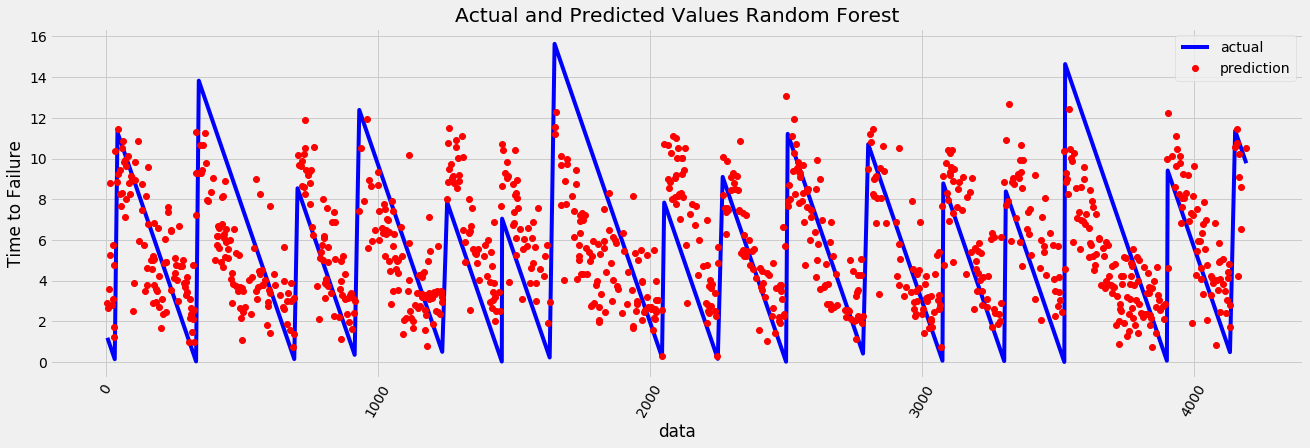

In [346]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20, 6


comparison.plot
# Plot the actual values
plt.plot(comparison['actual'], 'b-', label = 'actual')
# Plot the predicted values
plt.plot(comparison['prediction'], 'ro', label = 'prediction')
plt.xticks(rotation = '60'); 
plt.legend()
# Graph labels
plt.xlabel('data'); plt.ylabel('Time to Failure'); plt.title('Actual and Predicted Values Random Forest');

In [ ]:
# 

### Gradient Boosting

In [347]:
# Import the model we are using
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error

train

In [348]:
# Fit regression model
params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}
clf = GradientBoostingRegressor(**params)

model = clf.fit(train_features, train_labels)

D:\Programming\Anaconda\envs\tensorflow_env\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


test

In [349]:
predictions_clf = clf.predict(test_features)

Performance Metric

In [350]:
mae = mean_absolute_error(test_labels, predictions_clf)
print("MAE: %.4f" % mae)

MAE: 2.1531


Variable Importance

In [351]:
# Get numerical feature importances
importances = list(clf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: num_peaks_10         Importance: 0.61
Variable: abs_sum_change       Importance: 0.08
Variable: mean_abs_chng        Importance: 0.07
Variable: abs_mean             Importance: 0.02
Variable: gmean                Importance: 0.02
Variable: ac_10000             Importance: 0.02
Variable: hmean                Importance: 0.01
Variable: exp_ma_5000_mean     Importance: 0.01
Variable: exp_ma_5000_std      Importance: 0.01
Variable: abs_energy           Importance: 0.01
Variable: ac_10                Importance: 0.01
Variable: ac_1000              Importance: 0.01
Variable: bin_ent_10           Importance: 0.01
Variable: bin_ent_99           Importance: 0.01
Variable: complex_0            Importance: 0.01
Variable: ft_centroid          Importance: 0.01
Variable: ft_variance          Importance: 0.01
Variable: num_peaks_100        Importance: 0.01
Variable: num_peaks_500        Importance: 0.01
Variable: skew                 Importance: 0.01
Variable: ac_100               Importanc

Using the most important variables

In [352]:
# New random forest with only the two most important variables
clf_most_important = GradientBoostingRegressor(n_estimators= 1000, random_state=42)
# Extract the two most important features
important_features = [feature_importances[0][0], feature_importances[1][0]]

train_important = train_features[important_features]
test_important = test_features[important_features]

# Train the random forest
clf_most_important.fit(train_important, train_labels)
# Make predictions and determine the error
predictions = clf_most_important.predict(test_important)
errors = abs(predictions - test_labels.values)

mae = mean_absolute_error(test_labels, predictions_clf)
# Display the performance metrics
print('Mean Absolute Error:', mae , 'degrees.')


D:\Programming\Anaconda\envs\tensorflow_env\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Mean Absolute Error: 2.1530923956346273 degrees.


In [353]:
clf = GradientBoostingRegressor()

In [354]:
params = {
    'n_estimators' : [10,100,1000],
    'max_depth' : [1,3,5,10,100],
    'min_samples_leaf': [1,50,150,300]
}

In [355]:
gs = GridSearchCV(clf, params)

In [356]:
gs.fit(train_features, train_labels)

D:\Programming\Anaconda\envs\tensorflow_env\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
D:\Programming\Anaconda\envs\tensorflow_env\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Programming\Anaconda\envs\tensorflow_env\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Programming\Anaconda\envs\tensorflow_env\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y 

D:\Programming\Anaconda\envs\tensorflow_env\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Programming\Anaconda\envs\tensorflow_env\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Programming\Anaconda\envs\tensorflow_env\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Programming\Anaconda\envs\tensorflow_env\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed w

D:\Programming\Anaconda\envs\tensorflow_env\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Programming\Anaconda\envs\tensorflow_env\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Programming\Anaconda\envs\tensorflow_env\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Programming\Anaconda\envs\tensorflow_env\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed w

D:\Programming\Anaconda\envs\tensorflow_env\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Programming\Anaconda\envs\tensorflow_env\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Programming\Anaconda\envs\tensorflow_env\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Programming\Anaconda\envs\tensorflow_env\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed w

D:\Programming\Anaconda\envs\tensorflow_env\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Programming\Anaconda\envs\tensorflow_env\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Programming\Anaconda\envs\tensorflow_env\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Programming\Anaconda\envs\tensorflow_env\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed w

D:\Programming\Anaconda\envs\tensorflow_env\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Programming\Anaconda\envs\tensorflow_env\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Programming\Anaconda\envs\tensorflow_env\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Programming\Anaconda\envs\tensorflow_env\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed w

D:\Programming\Anaconda\envs\tensorflow_env\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Programming\Anaconda\envs\tensorflow_env\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Programming\Anaconda\envs\tensorflow_env\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Programming\Anaconda\envs\tensorflow_env\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed w

GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_sampl...=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [10, 100, 1000], 'max_depth': [1, 3, 5, 10, 100], 'min_samples_leaf': [1, 50, 150, 300]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [360]:
gs.best_estimator_

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=1, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=150,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [361]:
gs.best_params_

{'max_depth': 1, 'min_samples_leaf': 150, 'n_estimators': 100}

In [362]:
gs.best_score_

0.45101495980810763

In [363]:
preds_clf = gs.best_estimator_.predict(test_features)

In [364]:
mean_absolute_error(test_labels, preds_clf)

2.15596778357784

# Visualization

In [365]:
predictions_clf = predictions_clf.reshape(len(predictions_clf),1)

In [366]:
predictions_clf = pd.DataFrame(predictions_clf)
predictions_clf.set_index(test_labels.index,inplace=True)

In [367]:
comparison = pd.concat([test_labels, predictions_clf], axis=1, sort=True)
comparison.rename(columns = {'time_to_failure': 'actual',  0:'prediction'}, inplace = True)


In [368]:
comparison.head()

,actual,prediction
6,1.196798,2.983955
8,1.119097,2.630859
12,0.962700,2.520280
14,0.884999,6.366480
17,0.767999,4.653993


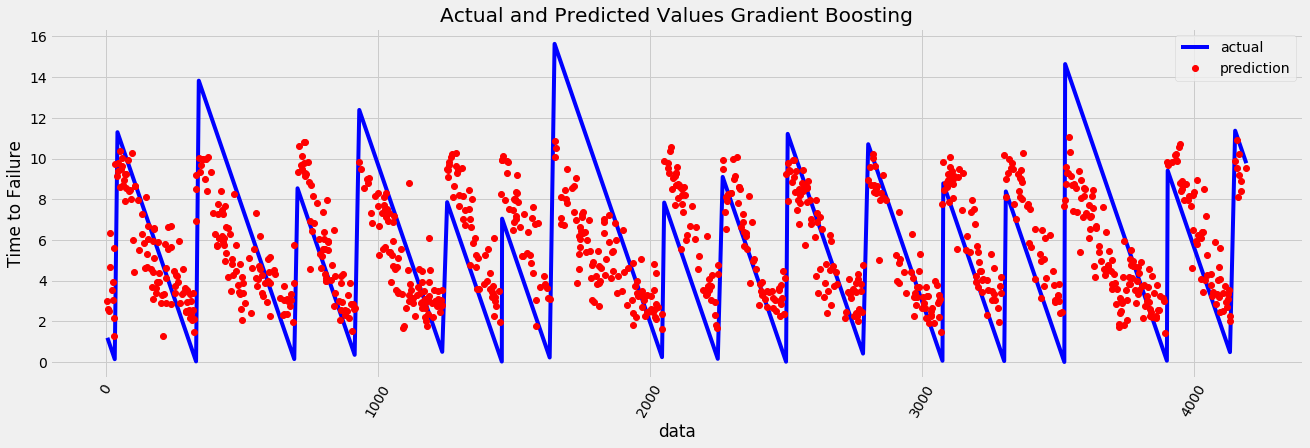

In [369]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20, 6


comparison.plot
# Plot the actual values
plt.plot(comparison['actual'], 'b-', label = 'actual')
# Plot the predicted values
plt.plot(comparison['prediction'], 'ro', label = 'prediction')
plt.xticks(rotation = '60'); 
plt.legend()
# Graph labels
plt.xlabel('data'); plt.ylabel('Time to Failure'); plt.title('Actual and Predicted Values Gradient Boosting');

### Neural Network

In [324]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

train

In [325]:
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(train_features, train_labels);

D:\Programming\Anaconda\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


test

In [326]:
# Use the forest's predict method on the test data
predictions_rf = rf.predict(test_features)

Performance Metric

In [327]:
# Calculate the absolute errors
mae = mean_absolute_error(test_labels, predictions_rf)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', mae, 'degrees.')

Mean Absolute Error: 2.1374674483095935 degrees.


Performance Metric

Variable Importance

In [328]:
# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: num_peaks_10         Importance: 0.42
Variable: abs_sum_change       Importance: 0.04
Variable: mean_abs_chng        Importance: 0.04
Variable: ac_10000             Importance: 0.03
Variable: ac_100               Importance: 0.03
Variable: abs_mean             Importance: 0.02
Variable: gmean                Importance: 0.02
Variable: unique_mean          Importance: 0.02
Variable: exp_ma_5000_std      Importance: 0.02
Variable: ma_5000_std          Importance: 0.02
Variable: ac_10                Importance: 0.02
Variable: ac_1000              Importance: 0.02
Variable: bin_ent_10           Importance: 0.02
Variable: ft_variance          Importance: 0.02
Variable: mean_chng            Importance: 0.02
Variable: num_peaks_100        Importance: 0.02
Variable: num_peaks_500        Importance: 0.02
Variable: skew                 Importance: 0.02
Variable: mean                 Importance: 0.01
Variable: max                  Importance: 0.01
Variable: min                  Importanc

Using the most important variables

In [331]:
# New random forest with only the two most important variables
rf_most_important = RandomForestRegressor(n_estimators= 1000, random_state=42)
# Extract the two most important features
important_features = [feature_importances[0][0], feature_importances[1][0]]

train_important = train_features[important_features]
test_important = test_features[important_features]

# Train the random forest
rf_most_important.fit(train_important, train_labels)
# Make predictions and determine the error
predictions = rf_most_important.predict(test_important)
errors = abs(predictions - test_labels.values)

# Display the performance metrics
mean_absolute_error(test_labels, predictions_rf)


D:\Programming\Anaconda\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.


2.1374674483095935

In [332]:
rf = RandomForestRegressor()

In [333]:
params = {
    'n_estimators' : [10,100,1000],
    'max_depth' : [1,3,5,10,100],
    'min_samples_leaf': [1,50,150,300]
}

In [334]:
gs = GridSearchCV(rf, params)

In [335]:
gs.fit(train_features, train_labels)

D:\Programming\Anaconda\envs\tensorflow_env\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
D:\Programming\Anaconda\envs\tensorflow_env\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Programming\Anaconda\envs\tensorflow_env\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Programming\Anaconda\envs\tensorflow_env\lib\site-packages\sklearn\model_selection\

D:\Programming\Anaconda\envs\tensorflow_env\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Programming\Anaconda\envs\tensorflow_env\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Programming\Anaconda\envs\tensorflow_env\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Programming\Anaconda\envs\tensorflow_env\lib\site-packages\sklearn\mod

D:\Programming\Anaconda\envs\tensorflow_env\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Programming\Anaconda\envs\tensorflow_env\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Programming\Anaconda\envs\tensorflow_env\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Programming\Anaconda\envs\tensorflow_env\lib\site-packages\sklearn\mod

D:\Programming\Anaconda\envs\tensorflow_env\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Programming\Anaconda\envs\tensorflow_env\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Programming\Anaconda\envs\tensorflow_env\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Programming\Anaconda\envs\tensorflow_env\lib\site-packages\sklearn\mod

D:\Programming\Anaconda\envs\tensorflow_env\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Programming\Anaconda\envs\tensorflow_env\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Programming\Anaconda\envs\tensorflow_env\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Programming\Anaconda\envs\tensorflow_env\lib\site-packages\sklearn\mod

D:\Programming\Anaconda\envs\tensorflow_env\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Programming\Anaconda\envs\tensorflow_env\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Programming\Anaconda\envs\tensorflow_env\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Programming\Anaconda\envs\tensorflow_env\lib\site-packages\sklearn\mod

D:\Programming\Anaconda\envs\tensorflow_env\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Programming\Anaconda\envs\tensorflow_env\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Programming\Anaconda\envs\tensorflow_env\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Programming\Anaconda\envs\tensorflow_env\lib\site-packages\sklearn\mod

GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [10, 100, 1000], 'max_depth': [1, 3, 5, 10, 100], 'min_samples_leaf': [1, 50, 150, 300]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [336]:
gs.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=100,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=50, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [337]:
gs.best_params_

{'max_depth': 100, 'min_samples_leaf': 50, 'n_estimators': 1000}

In [338]:
gs.best_score_

0.4526866935695553

In [339]:
preds = gs.best_estimator_.predict(test_features)

In [340]:
error = test_labels.values - preds

In [342]:
mean_absolute_error(test_labels, preds_clf)

2.151278680523106

In [343]:
# Import matplotlib for plotting and use magic command for Jupyter Notebooks
import matplotlib.pyplot as plt
%matplotlib inline
# Set the style
plt.style.use('fivethirtyeight')

In [344]:
predictions = predictions.reshape(len(predictions),1)
predictions = pd.DataFrame(predictions)
predictions.set_index(test_labels.index,inplace=True)

In [345]:
comparison = pd.concat([test_labels, predictions], axis=1, sort=True)
comparison.rename(columns = {'time_to_failure': 'actual',  0:'prediction'}, inplace = True)


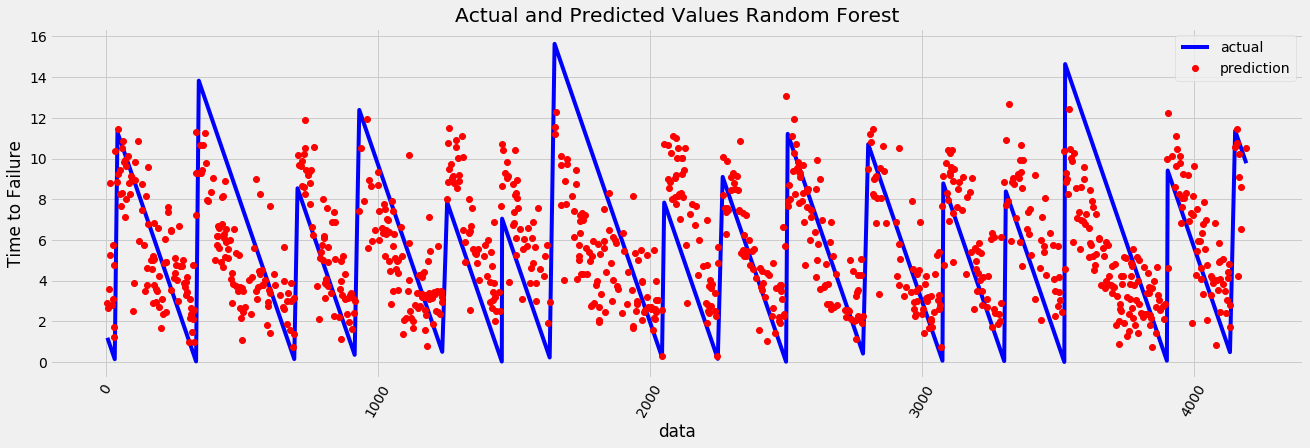

In [346]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20, 6


comparison.plot
# Plot the actual values
plt.plot(comparison['actual'], 'b-', label = 'actual')
# Plot the predicted values
plt.plot(comparison['prediction'], 'ro', label = 'prediction')
plt.xticks(rotation = '60'); 
plt.legend()
# Graph labels
plt.xlabel('data'); plt.ylabel('Time to Failure'); plt.title('Actual and Predicted Values Random Forest');

# Submission

In [ ]:
# Load submission file
submission = pd.read_csv(path + 'sample_submission.csv', index_col='seg_id', dtype={"time_to_failure": np.float32})

# Load each test data, create the feature matrix, get numeric prediction
for i, seg_id in enumerate(tqdm(submission.index)):
  #  print(i)
    seg = pd.read_csv(path + 'test\\' + seg_id + '.csv')
    x = seg['acoustic_data'].values
    submission.time_to_failure[i] =  gs.best_estimator_.predict(np.expand_dims(create_X(x), 0))

submission.head()

# Save
submission.to_csv('submission.csv')